# Lab 2 Daniel Claesson

Links to material I found useful in this lab:
- [Geeks for Geeks, working with csv files](https://www.geeksforgeeks.org/working-csv-files-python/)
- [Pyhton doc, reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
- [Programiz, python list count](https://www.programiz.com/python-programming/methods/list/count)
- [Stackoverflow, sort list based on another list](https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list)
- [nkmk.me, How to return multiple values from function](https://note.nkmk.me/en/python-function-return-multiple-values/)


**read_traingdata** funktionen:
- Läser in trainingdatan direkt från .txt-filen, filepath som argument
- Gör om strings till floats, tar bort white_spaces etc.
- Returnerar en list of lists: [[weight1, weight2,...],[height1, height2,...],[label1, label2,...]]

In [17]:
import matplotlib.pyplot as plt
import math

def read_trainingdata(filepath):
    """Returns list of list with width, heigh and label values."""
    with open(filepath, "r") as file:
        lines = file.readlines() # ger lista of strings, för varje rad i txt filen ['line1','line2'...]

    width = []
    height = []
    label = []
    pokemons = []

    for line in lines[1:]:
        features = line.split(',')
        pokemons.append([float(features[0]), float(features[1]), int(features[2])]) # ger lista of lists [['w1','h1','l1'],['w2','h2','l2'],...]
    
    del pokemons[0] # tar bort raden som innehåller överskriften i tabellen

    for pokemon in pokemons:
         width.append(pokemon[0])
         height.append(pokemon[1])
         label.append(pokemon[2])

    returnlist = []
    returnlist.append(width)
    returnlist.append(height)
    returnlist.append(label)

    return returnlist # ger lista of lists [[w1,w2,w3...],[h1,h2,h3...],[l1,l2,l3...]]

TD = read_trainingdata("..\Data\datapoints.txt")

print(TD)
print(len(TD[1]))




[[23.63591632187622, 17.714056417303343, 21.78020031891186, 25.20630552859312, 19.332572350434354, 24.73645685241186, 23.79257560586339, 24.557612968127465, 20.191281253428173, 25.813562951888365, 24.923378667802954, 25.311244044578427, 22.819091361866796, 19.639358214988224, 18.341233265627693, 22.723629043769336, 25.82936770950206, 20.23890182459327, 17.905128921789093, 24.385289647525166, 26.525412887538252, 19.299333494980544, 20.118681851201636, 22.980962976720388, 17.96926166354966, 21.58631807419169, 18.659636883604406, 19.209914415003638, 18.16229126686346, 19.120619567709372, 25.17676132371397, 18.583516818010633, 24.68867147060795, 23.02865997158701, 20.282109030336354, 17.672876665469843, 20.795121649361587, 20.101930916301317, 20.39204407747099, 23.868174335146136, 26.388368121945867, 25.567802785102412, 23.99071038023876, 23.792145242488125, 24.111063562798908, 20.098954730848863, 20.88810038727894, 24.587154114074174, 21.65956855815321, 18.59843317023302, 21.0695732409792

**plot_trainingdata** funktionen:
- plottar träningsdatan för varje sample, för Pikachu och Pichu.

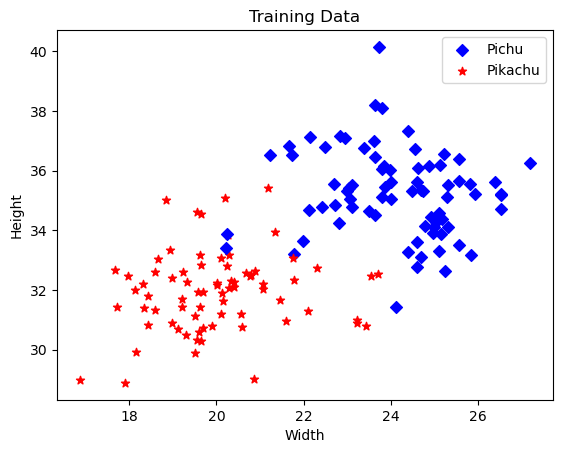

In [2]:
def plot_trainingdata(width, height, label):
    """Plots all training data"""
    for idx in range(len(label)):
        if label[idx] == 1:
            plt.scatter(width[idx], height[idx], color = 'blue', marker = "D")
        elif label[idx] == 0:
            plt.scatter(width[idx], height[idx], color = 'red', marker = "*")
        else: break
    
    plt.title('Training Data')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend(['Pichu','Pikachu'])


plot_trainingdata(TD[0], TD[1], TD[2])

**read_sampledata** funktionen:
- Läser in testpoint datan från textfilen.

In [3]:
def read_sampledata(filepath):
    """Functions reads the file testpoints.txt,
    extracts the width and height and stores
    as a list of lists, that can be parsed as arguments
    to the classifier function."""
    with open(filepath, 'r') as file:
        content = file.readlines()
    
    coordinates = []

    for idx in content:
        if '(' and ')' not in idx:
            continue
        else:
            idx_l = idx.find('(')
            idx_m = idx.find(',')
            idx_r = idx.find(')')
            x = float(idx[idx_l+1:idx_m])
            y = float(idx[idx_m+1:idx_r])

            coordinates_list = [x, y]

        coordinates.append(coordinates_list)

    return coordinates

sample_data_coord = read_sampledata('..\Data\\testpoints.txt')
print(sample_data_coord)


[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


**Classifier** funktionen:
- Nearest neighbour classifier
- tar en sample punkts coordinater som inputargument
- beräknar distansen mellan sample punkt och träningsdatans alla punkter
- identifirerar närmsta träningsdata punkt
- klassificerar Pichu / Pikatchu, beroende på närmsta punkts "label"
- Returnerar en sträng med resultatet

In [4]:
def classifier(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates
    and trainingdata from readin_trainingdata function.
    Coordinates to be given on format [x1, y1], a list."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = []
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    #finding index of the minimum distance, in "dist" list
    idx_min_dist = dist.index(min(dist))

    if TD_label[idx_min_dist] == 0:
        pokemon = "Pichu"
    elif TD_label[idx_min_dist] == 1:
        pokemon = "Pikachu"
   
    return pokemon
        
pokemon = classifier([24.2, 31.5])

print(pokemon)

Pikachu


**classifier10** funktionen:
- Nearest nieghbour classifier som baserar analysen på de 10 närmaste grannarna.

In [5]:
def classifier10(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list.
    Function uses 10 nearest neighbours for determination."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = [] #
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    # skapar sorterad lista för labels, baserad på dist-listan.
    TD_label_sorted_10 = [x[1] for x in sorted(zip(dist, TD_label))] # https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list

    print(f"{TD_label_sorted_10[0:10] = }") # ger en lista av de 10 närmsta Pokemons labels
   
    if TD_label_sorted_10[0:10].count(0) > 5:
        pokemon = "Pichu"
    elif TD_label_sorted_10[0:10].count(1) > 5:
        pokemon = "Pikachu"
    else: pokemon = "it's a draw!"
    
    return pokemon
        
pokemon = classifier10([24.2, 31.5])

print(f"The identified Pokemon is {pokemon}.")

TD_label_sorted_10[0:10] = [1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
The identified Pokemon is it's a draw!.


**multi_evaluation** funktionen:
- tar lista med flertalet coordinater som inputargument, tex resultatet från inläsningen av textfilen.
- för varje koordinat anropas classifier funktionen, vars output används i denna funktionen för att skriva ut resultatet.

In [6]:
def multi_evaluation(data):
    """Evaluates multiple coordinates, arguments as a list.
    Returns classification for each of the coordinates."""
    res_str = ""
    for element in data:
        pokemon = classifier(element)
        res_str = res_str + (f"Sample with (width, heigt): {element[0]}, {element[1]} classified as {pokemon}.\n")
    
    print(res_str)


data = multi_evaluation(sample_data_coord)

Sample with (width, heigt): 25.0, 32.0 classified as Pikachu.
Sample with (width, heigt): 24.2, 31.5 classified as Pikachu.
Sample with (width, heigt): 22.0, 34.0 classified as Pikachu.
Sample with (width, heigt): 20.5, 34.0 classified as Pichu.



Manual user input.
- Here the user is asked to input weight and height of the Pokemon.
- The classifier function is called, with user defines weight and height.
- Error messages are given if the input is not reasonable.

In [7]:
def get_user_width():
    while True:
        try:
            user_width = float(input ("Enter width as a positive float or integer greater than 10: "))
            if user_width < 10:
                print("Pokemon width must be greater than 10.")
                continue
            else: return user_width

        except ValueError:
            print("Invalid input. Must be float or integer >10.")

        return user_width

def get_user_height():
    while True:    
        try:
            user_height = float(input ("Enter height as a positive float or integer greater than 10: "))
            if user_height < 10:
                print("Pokemon height must be greater than 10.")
                continue
            else: return user_height

        except ValueError:
            print("Invalid input. Must be float or integer >10.")
    
        return user_height

user_width = get_user_width()
user_height = get_user_height()

user_call = []
user_call.append(user_width)
user_call.append(user_height)

user_result = classifier(user_call)
print(f"The Pokemon classification is {user_result}, with width = {user_width} cm and height = {user_height} cm")


The Pokemon classification is Pichu, with width = 22.0 cm and height = 23.0 cm


# Valfria uppifter
- **data_prepare** funktion: använder redan inläst testdata (TD), för att dela upp så att det finns 50 träningsdata för Pikachu och 50 träningsdata för Pichu, slumpmässigt. Samt då 25 Pikachu sample data och 25 Pichu sample data.

In [13]:
import random

def data_prepare(TD):
    """Function returns one list of lists with data for 50 Pichu and
    50 Pikachu, and another list of lists with 25 Pichu and 25 Pikachu,
    all randomly selected from Test Data (TD), i.e. it uses already read
    in data. Format [[width],[hight],[label]]"""
    width = TD[0]
    height = TD[1]
    label = TD[2]

    #create lists containing Pichu or Pikachu only
    width_pichu = [x for x, y in zip(width, label) if y == 0]
    height_pichu = [x for x, y in zip(height, label) if y == 0]
    width_pikachu = [x for x, y in zip(width, label) if y == 1]
    height_pikachu = [x for x, y in zip(height, label) if y == 1]
    
    # randomise the lists. Creating a template to sort by (random unique integers, ranging from 0 to max len of list)
    random_template = random.sample(range(0, len(width_pichu)), len(width_pichu))

    # create new lists where the random "template" is applied to the data, creating randomized data:
    width_pichu_random = [y for x, y in sorted(zip(random_template, width_pichu))]
    height_pichu_random = [y for x, y in sorted(zip(random_template, height_pichu))]
    label_pichu_random = [0] * len(height_pichu_random)
        
    width_pikachu_random = [y for x, y in sorted(zip(random_template, width_pikachu))]
    height_pikachu_random = [y for x, y in sorted(zip(random_template, height_pikachu))]
    label_pikachu_random = [1] * len(height_pikachu_random)
    
    # create one list of "test data", 100 data points in total (50 Pichu/50 Pikachu)
    TD100 = [width_pichu_random[0:50] + width_pikachu_random[0:50],height_pichu_random[0:50] + height_pikachu_random[0:50],label_pichu_random[0:50] + label_pikachu_random[0:50]]
    # create one list of "sample data", 50 data points in total (25 Pichu / 25 Pikachu)
    SD50 =  [width_pichu_random[50:] + width_pikachu_random[50:],height_pichu_random[50:] + height_pikachu_random[50:],label_pichu_random[50:] + label_pikachu_random[50:]]


    return TD100, SD50
TD100, SD50 = data_prepare(TD)

#print(TD100)
#print(SD50)
#print(len(TD100[0]))
print(len(SD50[0]))
#print(len(TD[0]))

48


**classifier_plus** funktion som tar både testdata och sampledata som argument.
- Funktionen classificerar varje sample data samt jämför med "facit" (dess label).
- Funktion som klassificerar alla sample data mot testdatan. Returnerar en lista med klassificeringsresultatet.

In [9]:
def classifier_plus(testdata, sampledata):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on testdata(=trainingdata)
    and sampledata coordinates. Returns list of classification result."""
    label_class = [] # the label result, based on nearest neighbour classification

    for sample in range(len(sampledata[0])): # for each of the sample data...
        dist = []
        for idx in range(len(testdata[0])): # calculate the distance to all test data points
            d = math.sqrt((testdata[0][idx] - sampledata[0][sample])**2 + (testdata[1][idx] - sampledata[1][sample])**2)
            dist.append(d) # append all distances to the dist list
    
        idx_min_dist = dist.index(min(dist)) #finding index of the minimum distance, in "dist" list

        if testdata[2][idx_min_dist] == 0: # if identifyning Pichu...
            label_class.append(0) # add a zero to the resulting list
        elif testdata[2][idx_min_dist] == 1: # or if identifying as Pikachu
            label_class.append(1) # add a one to the resulting list
   
    return label_class
        
result_classification = classifier_plus(TD100, SD50)

print(result_classification)
print(len(result_classification))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
48


**accurazy** funktionen beräknar accuracy på klassificering.
- Inputargument är känd label för varje Pokemon samt klassificerad label från classifier_plus funktionen.
- Beräknar True Positive och True Negative, för varje sample data.

In [10]:
def accuracy(correct_classification, result_classification):
    """Function takes correct classification as a list and
    result classification as a list, and calculates and returns the accuracy."""
    TP_counter = 0
    TN_counter = 0
    total_counter = 0

    for idx in range(len(result_classification)):
        if result_classification[idx] == 1 and correct_classification[idx] == 1:
            TP_counter += 1
            total_counter += 1
        elif result_classification[idx] == 0 and correct_classification[idx] == 0:
            TN_counter += 1
            total_counter += 1
        else: total_counter += 1
    
    accuracy = (TP_counter + TN_counter) / total_counter

    return accuracy


accuracy_eval = accuracy(SD50[2], result_classification)

print(accuracy_eval)


0.9166666666666666


**multirun_function** som anropar data_prepare, result_classification, accuracy_eval, nbr_times antal gånger.- Sparar accuracy från varje loops resultat till en lista.
- Plottar resultatet i en bar graph
- Skriver ut medel accuracy.

Average accuracy is 94.8%.


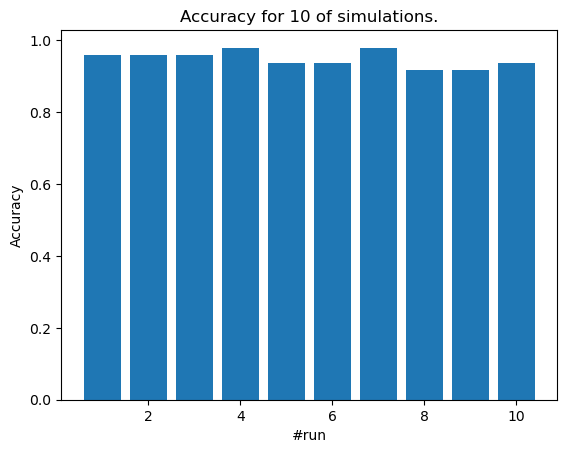

In [11]:
def multirun_plot(nbr_times):
    """Loops all functions for nbr_times of times, calculates accuracy
        for each loop. Stores accuracy in a list, and in the end calculates
        and prints average accuracy. Takes number of loops as input argument."""
    multirun_result = []
    for time in range(nbr_times):
        TD100, SD50 = data_prepare(TD)
        result_classification = classifier_plus(TD100, SD50)
        accuracy_eval = accuracy(SD50[2], result_classification)
        multirun_result.append(accuracy_eval)
    
    #print(multirun_result)
    x_values = list(range(1,nbr_times+1))
    #print(x_values)
    average_accuracy = sum(multirun_result) / len(multirun_result)
    print(f"Average accuracy is {average_accuracy:.1%}.")
    plt.bar(x_values,multirun_result)
    plt.ylabel('Accuracy')
    plt.xlabel('#run')
    plt.title(f'Accuracy for {nbr_times} of simulations.')


multirun_plot(10)
